In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats
import itertools


__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?


In [2]:
x = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [3]:
x1 = x[:, 0:2]
ones = np.ones((x.shape[0], 1))
x1 = np.hstack((ones, x1))

XTX = x1.T.dot(x1)
np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x1.T).dot(y)

z = x1.dot(b)
R1 = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R1


0.18113594742585215

In [4]:
x2 = x[:, 1:3]
ones = np.ones((x.shape[0], 1))
x2 = np.hstack((ones, x2))

XTX = x2.T.dot(x2)
np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y)

z = x2.dot(b)
R2 = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R2

0.547948273403901

In [5]:
x3 = x[:, 2:4]
ones = np.ones((x.shape[0], 1))
x3 = np.hstack((ones, x3))

XTX = x3.T.dot(x3)
np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x3.T).dot(y)

z = x3.dot(b)
R3 = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R3

0.6224419876505324

In [6]:
x5 = x[:, 0:4:3]
ones = np.ones((x.shape[0], 1))
x5 = np.hstack((ones, x5))

XTX = x5.T.dot(x5)
np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x5.T).dot(y)

z = x5.dot(b)
R5 = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R5

0.4532966783144079

In [7]:
x6 = x[:, 1:4:2]
ones = np.ones((x.shape[0], 1))
x6 = np.hstack((ones, x6))

XTX = x6.T.dot(x6)
np.linalg.det(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x6.T).dot(y)

z = x6.dot(b)
R6 = 1 - ((y - z)**2).sum() / ((y - y.mean()) ** 2).sum()
R6

0.6062055761129932

__Лучшая модель линейной регрессии получается с признаками 3 и 4.__

In [8]:
x3

array([[1.        , 3.03636353, 2.69287214],
       [1.        , 5.12093014, 3.46363202],
       [1.        , 5.79686488, 1.86159445],
       [1.        , 3.65529809, 1.66746094],
       [1.        , 2.50594319, 1.69755173],
       [1.        , 2.84124027, 4.54410559],
       [1.        , 1.95026215, 1.51874636],
       [1.        , 7.47708735, 2.61081203],
       [1.        , 3.61420599, 5.10773362],
       [1.        , 1.65752765, 1.59635987]])

__Проведем F-тест Фишера:__

In [9]:
n = x3.shape[0]
m = x3.shape[1]  - 1

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [10]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область:
$$\Omega_\alpha = \left( 4.74, \infty \right)$$

In [11]:
F = (R3 / k1) / ((1 - R3) / k2)
F

5.770098595498487

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

__Коэффициенты линейной регрессии с помощью формул для парной регрессии:__

In [12]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
salary

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [13]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

__Коэффициенты линейной регрессии с помощью помощью метода наименьших квадратов:__

In [14]:
ones = np.ones((salary.shape[0], 1))
salary2 = salary.reshape(10, 1)
salary2 = np.hstack((ones, salary2))
salary2


array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [15]:
XTX = salary2.T.dot(salary2)
np.linalg.det(XTX)

349464.00000000023

In [16]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary2.T).dot(scoring)

print(b)

[444.17735732   2.62053888]


__Scatter plot:__

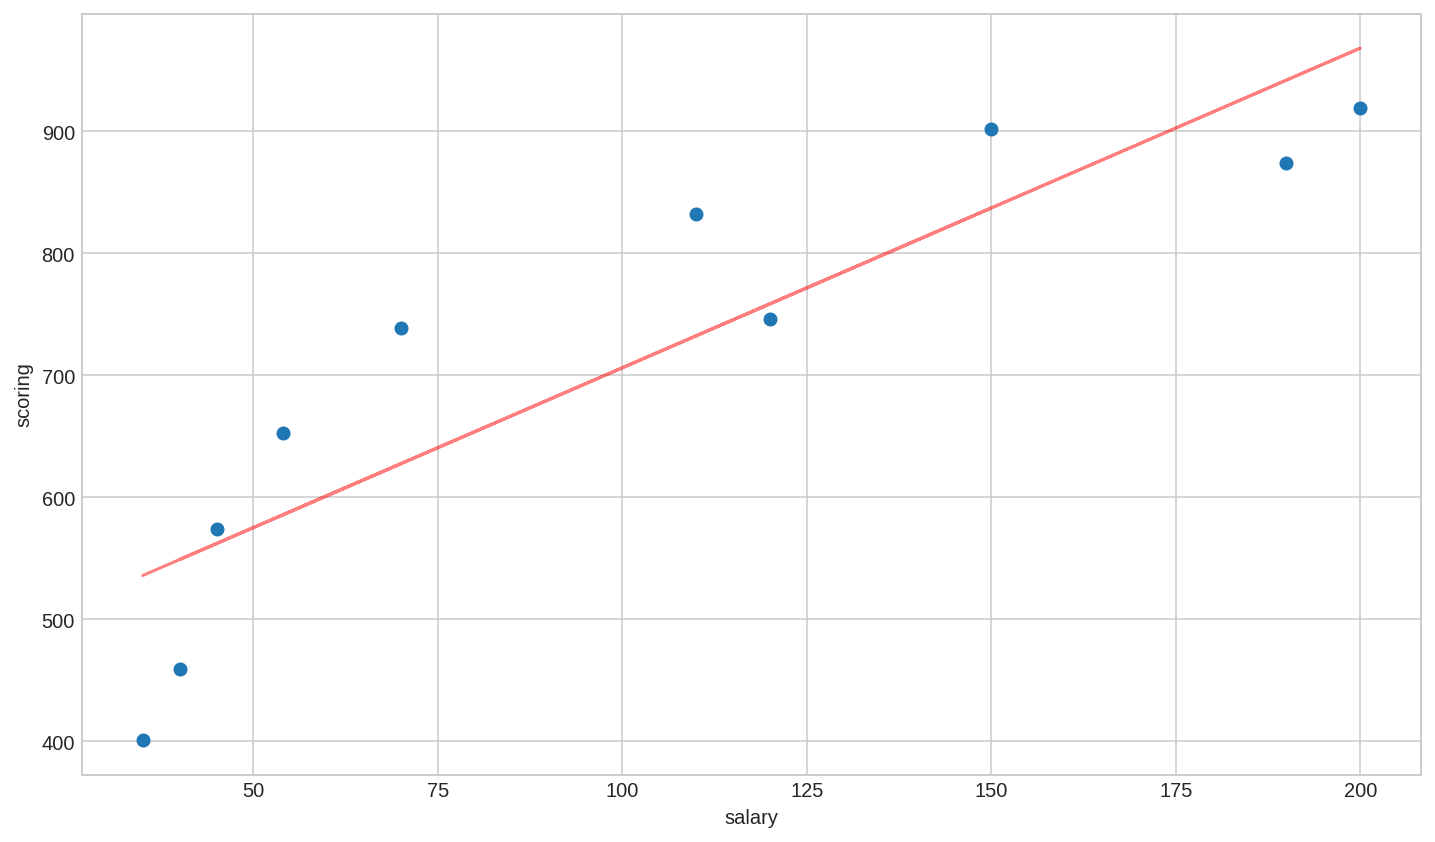

In [17]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

__Коэффициент детерминации:__

In [18]:
z = b0 + b1 * salary

In [19]:
R = 1 - ((scoring - z)**2).sum() / ((scoring - scoring.mean()) ** 2).sum()
R

0.7876386635293686

__F-критерий Фишера (уровень значимости alpha = 0.05):__

In [20]:
n = salary.shape[0]
m = 1
k1 = m
k2 = n - m - 1

In [21]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [22]:
F = (R / k1) / ((1 - R) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Средняя ошибка аппроксимации__

In [23]:
np.abs((scoring - z) / scoring).mean()

0.11469251843561709

Теоретические значения близки к тем, которые выдает модель линейной регрессии